<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Garage3" data-toc-modified-id="Garage3-1">Garage3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-1.1">Standard ICP</a></span></li><li><span><a href="#With-Segmentation" data-toc-modified-id="With-Segmentation-1.2">With Segmentation</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-1.3">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-1" data-toc-modified-id="Rumlang-1-2">Rumlang 1</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-2.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-2.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-2" data-toc-modified-id="Rumlang-2-3">Rumlang 2</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-3.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-3.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-3" data-toc-modified-id="Rumlang-3-4">Rumlang 3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-4.1">Standard ICP</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.spatial.transform as stf
import re
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from bfseg.utils.models import create_model
import bfseg.data.hive.office_rumlang_validation_labeled
%matplotlib inline

Segmentation Models: using `tf.keras` framework.


# Rumlang 1
## Localisation

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
#plt.plot(icp['trans_x'], icp['trans_y'])
#plt.plot(leica['aligned_x'], leica['aligned_y'])
#plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
print('NYU Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))
nyuicp = icp
nyuleica = leica

icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_icp_46.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_leica_46.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
plt.plot(nyuicp['headerstamp'], nyuicp['rmse_xy'].rolling(10).mean())
plt.plot(icp['headerstamp'], icp['rmse_xy'].rolling(10).mean())
plt.show()
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

NYU Mean: 0.147, Median: 0.091


<Figure size 432x288 with 0 Axes>

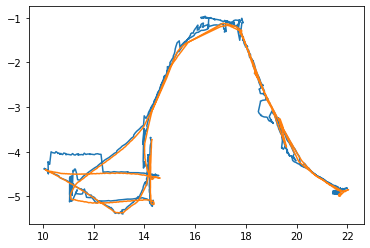

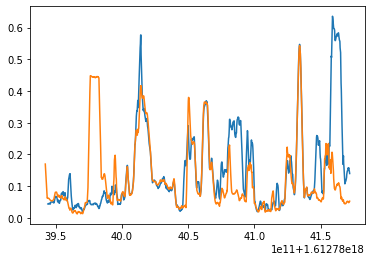

Mean: 0.125, Median: 0.076


In [2]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
#plt.plot(icp['trans_x'], icp['trans_y'])
#plt.plot(leica['aligned_x'], leica['aligned_y'])
#plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
print('NYU Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))
nyuicp = icp
nyuleica = leica

icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_icp_61.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_online_learning_rumlang1_leica_61.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
plt.plot(nyuicp['headerstamp'], nyuicp['rmse_xy'].rolling(10).mean())
plt.plot(icp['headerstamp'], icp['rmse_xy'].rolling(10).mean())
plt.show()
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [12]:

# load the  model
_, full_model = create_model(model_name="fast_scnn",
                            freeze_encoder=False,
                            freeze_whole_model=False,
                            normalization_type="group",
                            image_h=480,
                            image_w=640)
model = tf.keras.Model(inputs=full_model.input, 
                       outputs=full_model.output)
optimizer = tf.keras.optimizers.Adam(.1)
checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)

ds = tfds.load('office_rumlang_validation_labeled', split='RUMLANG', as_supervised=True)

mious = []
for ckpt_num in sorted(int(p[5:-6]) 
        for p in tf.io.gfile.listdir('/tmp/online_learning_3') 
        if p.endswith('index'))[:200:10]:
  checkpoint.restore('/tmp/online_learning_3/ckpt-{}'.format(ckpt_num)).expect_partial()
  miou = tf.keras.metrics.MeanIoU(num_classes=2)
  for batch in ds.batch(10):
    pred = tf.argmax(model(
            tf.image.convert_image_dtype(batch[0], tf.float32)),
            axis=-1)
    miou.update_state(batch[1], pred)
  res = miou.result()
  print(ckpt_num, res.numpy())
  mious.append(res)



Using the following parameters to instantiate the model fast_scnn: {'input_shape': (480, 640, 3), 'num_downsampling_layers': 3, 'num_classes': 2, 'normalization_type': 'group'}.

1 0.35237557
11 0.3689018
21 0.33101282
31 0.3516034
41 0.3479138
51 0.3702445
61 0.34525725
71 0.33923534
81 0.3312225
91 0.33591518
101 0.3258874
111 0.323712
121 0.34049883


In [ ]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.61278e18+39.5e11, 1.61278e18+40.5e11)

a better working example (rotated in the correct direction in the end)

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_icp_44.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_leica_44.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

In [ ]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.15e9, leica['aligned_x'])
plt.xlim(1.61278e18+39.5e11, 1.61278e18+39.8e11)
plt.ylim(12, 14)

## Segmentation from NYU

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Our Segmentation

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Rumlang 2
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

In [ ]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.65e9, leica['aligned_x'])
plt.xlim(1.612784e18+5.0e11, 1.612784e18+5.1e11)
plt.ylim(14.5, 16.5)

## Segmentation from NYU

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

In [ ]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.65e9, leica['aligned_x'])
plt.xlim(1.612784e18+5.0e11, 1.612784e18+5.1e11)
plt.ylim(14.5, 16.5)

with Francescos pretraine model:

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Rumlang 3
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang3_leica_1.csv')
# remove single outlier measurement
leica = leica.drop(index=307)
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## NYU Pretraining

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang3_leica_1.csv')
# remove single outlier measurement
leica = leica.drop(index=307)
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [ ]:
plt.plot(range(20), leica['trans_x'][306:320])

In [ ]:
plt.plot(range(20), leica['trans_x'][300:320])

In [ ]:
leica.iloc[306:309]

# Office4
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_icp_5.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_leica_5.csv')
# alignment of reference frames
leica['aligned_x'] = leica['trans_x']
leica['aligned_y'] = leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_icp_8.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_leica_8.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [ ]:
plt.plot(icp['headerstamp'], icp['trans_y'])
plt.plot(leica['headerstamp'] + 4e8, leica['aligned_y'])
plt.xlim(1.613643e18+6.6e11, 1.613643e18+6.8e11)
plt.ylim(6, 10)

## NYU Pretraining

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office4_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office4_leica_3.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Office5
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_leica_4.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_icp_5.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_leica_5.csv')
# alignment of reference frames
leica['aligned_x'] = leica['trans_x']
leica['aligned_y'] = leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

## NYU Pretraining

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office5_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office5_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Office6
## Standard ICP

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office6_icp_6.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office6_leica_6.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## NYU Segmentation

In [ ]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office6_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office6_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))